In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv('/Users/zohrehsamieekadkani/Downloads/Electric_Vehicle_Population_Data.csv')
dataframe.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              23569

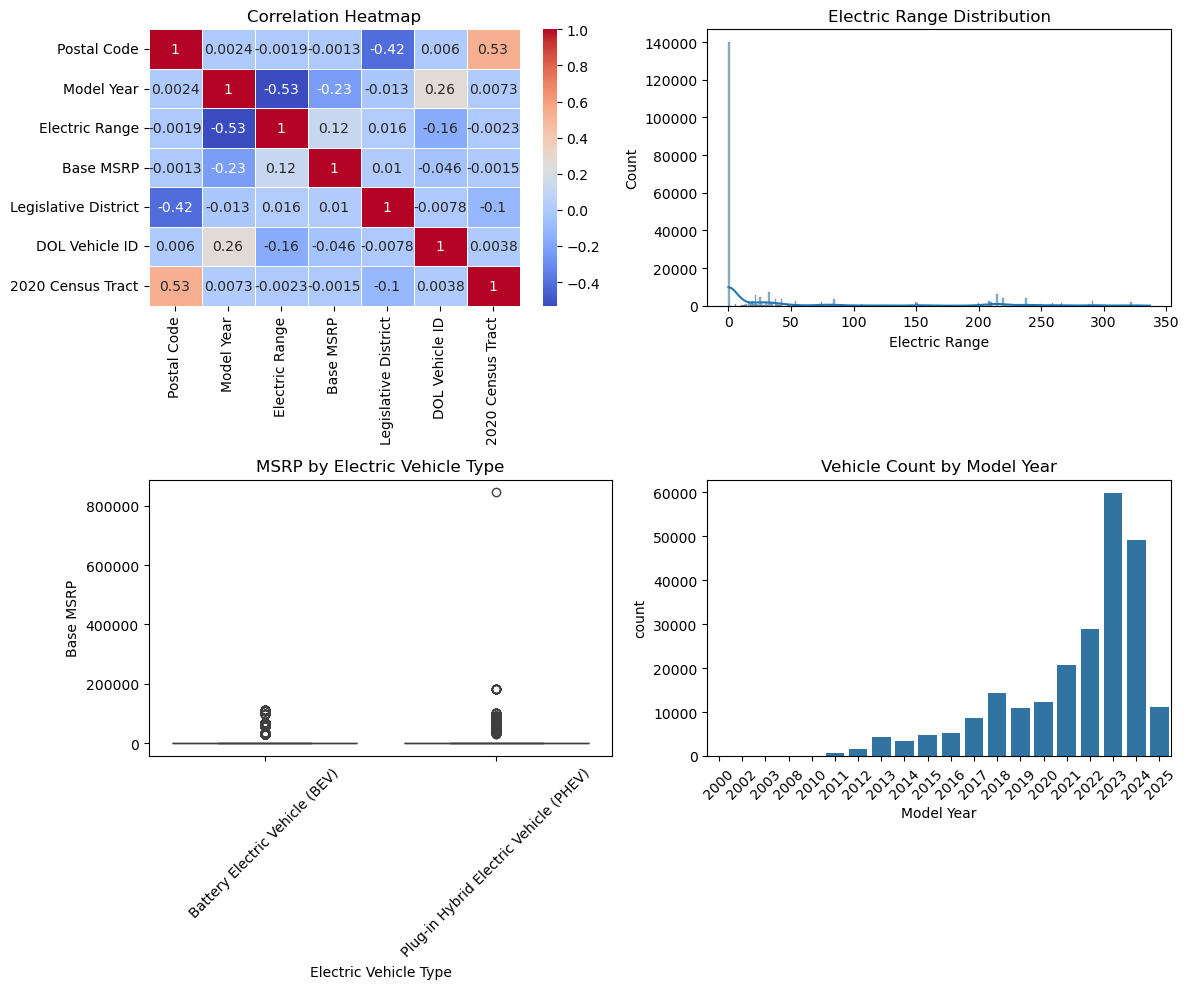


Advanced Insights:

Average Electric Range by Vehicle Type:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            50.163799
Plug-in Hybrid Electric Vehicle (PHEV)    31.269719
Name: Electric Range, dtype: float64

CAFV Eligibility Distribution:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    0.592982
Clean Alternative Fuel Vehicle Eligible                         0.311071
Not eligible due to low battery range                           0.095947
Name: proportion, dtype: float64


In [14]:


def comprehensive_analysis(dataframe):
    # 1. Basic Information
    print("Dataset Overview:")
    print(dataframe.info())
    
    # 2. Missing Value Analysis
    print("\nMissing Values:")
    print(dataframe.isnull().sum())
    
    # 3. Descriptive Statistics for Numeric Columns
    print("\nNumeric Columns Descriptive Statistics:")
    print(dataframe.describe())
    
    # 4. Categorical Column Analysis
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    print("\nCategorical Column Value Counts:")
    for col in categorical_columns:
        print(f"\n{col} Distribution:")
        print(dataframe[col].value_counts(normalize=True).head())
    
    # 5. Correlation Matrix for Numeric Columns
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = dataframe[numeric_columns].corr()
    
    # 6. Visualizations
    plt.figure(figsize=(12, 10))
    
    # Correlation Heatmap
    plt.subplot(2, 2, 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    
    # Electric Range Distribution
    plt.subplot(2, 2, 2)
    sns.histplot(dataframe['Electric Range'], kde=True)
    plt.title('Electric Range Distribution')
    
    # MSRP Box Plot by Electric Vehicle Type
    plt.subplot(2, 2, 3)
    sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=dataframe)
    plt.title('MSRP by Electric Vehicle Type')
    plt.xticks(rotation=45)
    
    # Model Year Distribution
    plt.subplot(2, 2, 4)
    sns.countplot(x='Model Year', data=dataframe)
    plt.title('Vehicle Count by Model Year')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 7. Advanced Analysis
    print("\nAdvanced Insights:")
    
    # Average Electric Range by Vehicle Type
    print("\nAverage Electric Range by Vehicle Type:")
    print(dataframe.groupby('Electric Vehicle Type')['Electric Range'].mean())
    
    # CAFV Eligibility Distribution
    print("\nCAFV Eligibility Distribution:")
    print(dataframe['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True))

# Run the comprehensive analysis
comprehensive_analysis(dataframe)

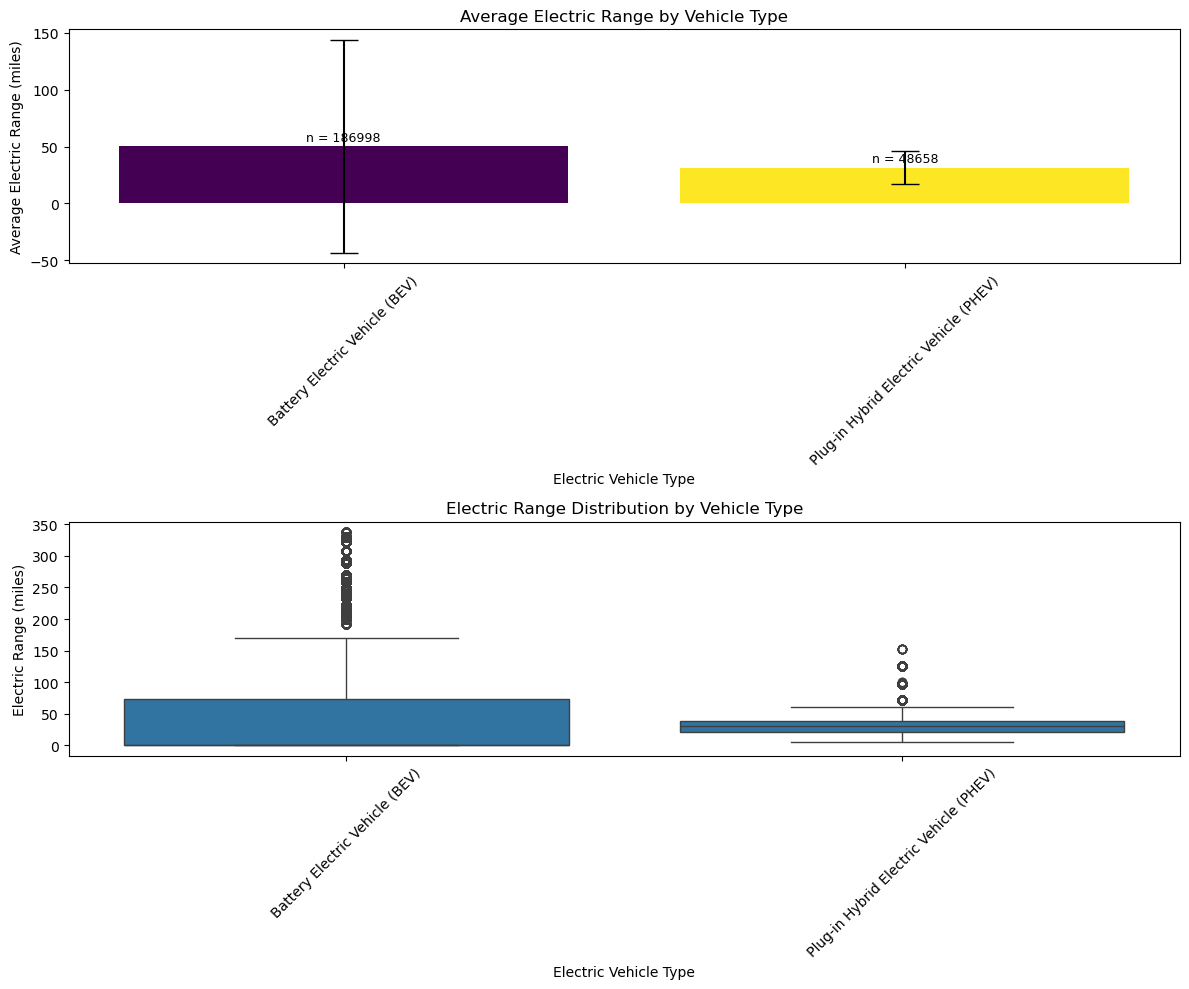

Electric Range Statistics by Vehicle Type:
                    Electric Vehicle Type       mean   count        std
0          Battery Electric Vehicle (BEV)  50.163799  186998  93.661931
1  Plug-in Hybrid Electric Vehicle (PHEV)  31.269719   48658  14.599478


In [17]:


def improved_vehicle_type_range_plot(dataframe):
    # Calculate average electric range by vehicle type
    avg_range_by_type = dataframe.groupby('Electric Vehicle Type')['Electric Range'].agg(['mean', 'count', 'std']).reset_index()
    
    # Sort by mean range to make the plot more readable
    avg_range_by_type = avg_range_by_type.sort_values('mean', ascending=False)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Bar plot of average electric range
    colors = plt.cm.viridis(np.linspace(0, 1, len(avg_range_by_type)))
    bars = ax1.bar(avg_range_by_type['Electric Vehicle Type'], 
            avg_range_by_type['mean'], 
            yerr=avg_range_by_type['std'],
            capsize=10,
            color=colors)
    ax1.set_title('Average Electric Range by Vehicle Type')
    ax1.set_xlabel('Electric Vehicle Type')
    ax1.set_ylabel('Average Electric Range (miles)')
    ax1.tick_params(axis='x', rotation=45)
    
    # Annotate with number of vehicles
    for i, v in enumerate(avg_range_by_type['mean']):
        ax1.text(i, v + 5, f'n = {avg_range_by_type["count"].iloc[i]}', 
                 ha='center', fontsize=9)
    
    # Boxplot to show range distribution
    sns.boxplot(x='Electric Vehicle Type', y='Electric Range', 
                data=dataframe, ax=ax2)
    ax2.set_title('Electric Range Distribution by Vehicle Type')
    ax2.set_xlabel('Electric Vehicle Type')
    ax2.set_ylabel('Electric Range (miles)')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("Electric Range Statistics by Vehicle Type:")
    print(avg_range_by_type)

# Run the improved plot
improved_vehicle_type_range_plot(dataframe)

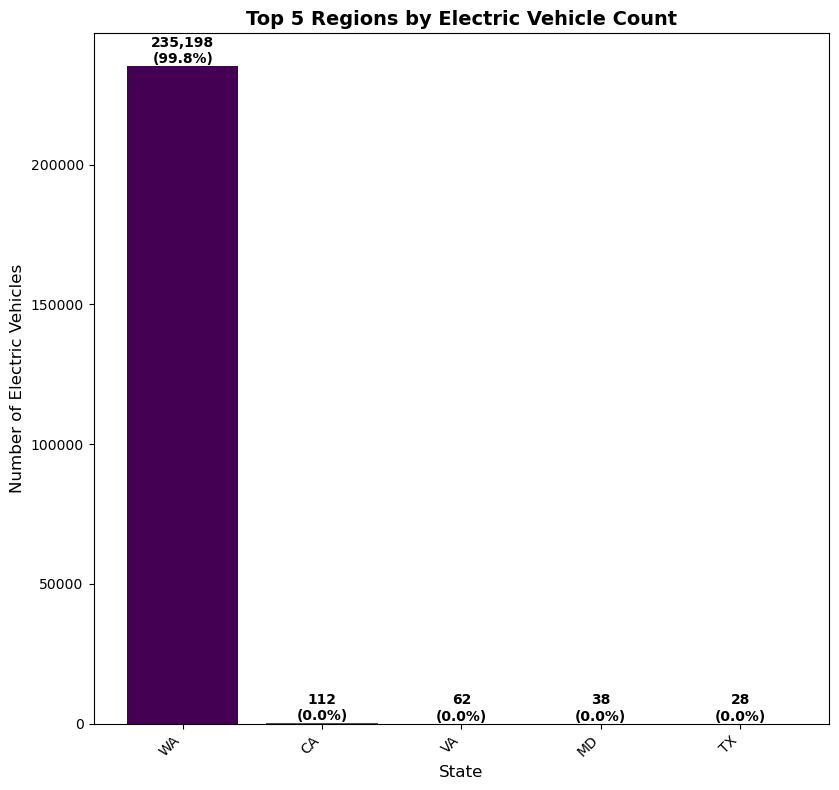

Top 5 Regions by Electric Vehicle Count:
WA: 235,198 vehicles (99.79% of total)
CA: 112 vehicles (0.05% of total)
VA: 62 vehicles (0.03% of total)
MD: 38 vehicles (0.02% of total)
TX: 28 vehicles (0.01% of total)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def top_5_electric_vehicle_regions(dataframe):
    # Group by State and count vehicles
    state_vehicle_counts = dataframe['State'].value_counts()
    
    # Select top 5 states
    top_5_states = state_vehicle_counts.head(5)
    
    # Calculate total vehicles
    total_vehicles = dataframe['State'].count()
    
    # Create a figure with increased size
    plt.figure(figsize=(16, 8))
    
    # Create bar plot
    plt.subplot(121)
    colors = cm.viridis(np.linspace(0, 1, len(top_5_states)))
    bars = plt.bar(top_5_states.index, top_5_states.values, color=colors)
    plt.title('Top 5 Regions by Electric Vehicle Count', fontsize=14, fontweight='bold')
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Number of Electric Vehicles', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    
    # Annotate with exact numbers and percentages
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total_vehicles) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height):,}\n({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')



    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("Top 5 Regions by Electric Vehicle Count:")
    for state, count in top_5_states.items():
        percentage = (count / total_vehicles) * 100
        print(f"{state}: {count:,} vehicles ({percentage:.2f}% of total)")

# Run the analysis
top_5_electric_vehicle_regions(dataframe)